In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv("airline-safety.csv")
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,aer lingus,320906734,2,0,0,0,0,0
1,aeroflot*,1197672318,76,14,128,6,1,88
2,aerolineas argentinas,385803648,6,0,0,1,0,0
3,aeromexico*,596871813,3,1,64,5,0,0
4,air canada,1865253802,2,0,0,2,0,0


In [3]:
x = datetime.datetime(2014,6,14) - datetime.datetime(2000,1,1)
df['total_fatailites'] = df['fatalities_85_99'] + df['fatalities_00_14']
df['total_incidents'] = df['incidents_85_99'] + df['incidents_00_14']
df['total_fatal_accidents'] = df['fatal_accidents_85_99'] + df['fatal_accidents_00_14']
df['trillion_available_seat_km_00_14'] = (df['avail_seat_km_per_week'] * x.days/ 7) / 10**12
df['trillion_available_seat_km_85_99'] = (df['avail_seat_km_per_week'] * 52 *15) / 10**12
df['total_trillion_available_seat_km'] = df['trillion_available_seat_km_85_99']+ df['trillion_available_seat_km_00_14']
df['total_fatalities per trillion_available_seat_km'] = df['total_fatailites'] / df['total_trillion_available_seat_km']
df['total_incidents per trillion_available_seat_km'] = df['total_incidents'] /df['total_trillion_available_seat_km']
df['total_fatal_accidents per trillion_available_seat_km'] =df['total_fatal_accidents'] / df['total_trillion_available_seat_km']
df.to_csv("data4.csv")

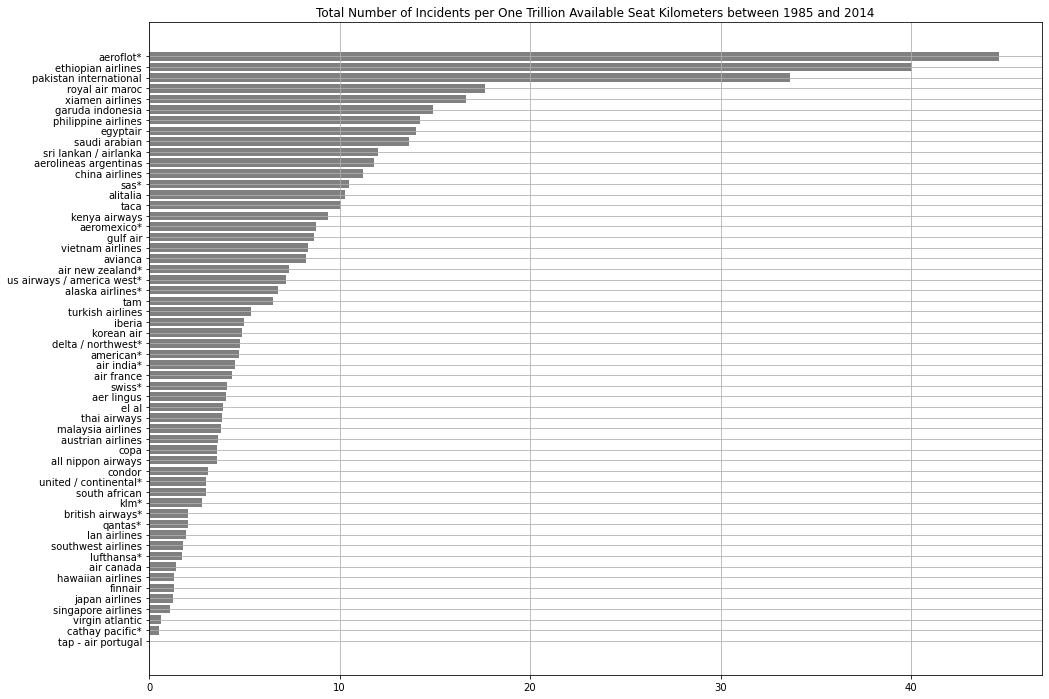

In [4]:
df = df.sort_values("total_incidents per trillion_available_seat_km")
plt.figure(figsize=(16,12))
plt.barh(y = df["airline"], width = df['total_incidents per trillion_available_seat_km'], color = 'gray')
plt.grid()
plt.title("Total Number of Incidents per One Trillion Available Seat Kilometers between 1985 and 2014") 
plt.show()

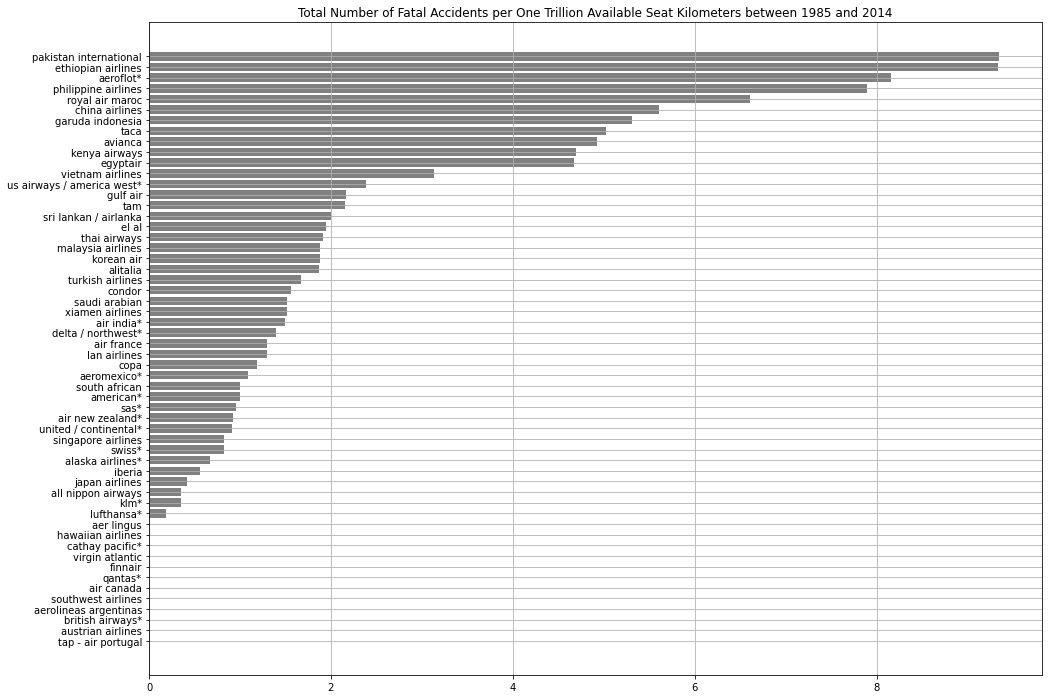

In [5]:
df = df.sort_values("total_fatal_accidents per trillion_available_seat_km")
plt.figure(figsize=(16,12))
plt.barh(y = df["airline"], width = df['total_fatal_accidents per trillion_available_seat_km'], color = 'gray')
plt.grid()
plt.title("Total Number of Fatal Accidents per One Trillion Available Seat Kilometers between 1985 and 2014") 
plt.show()

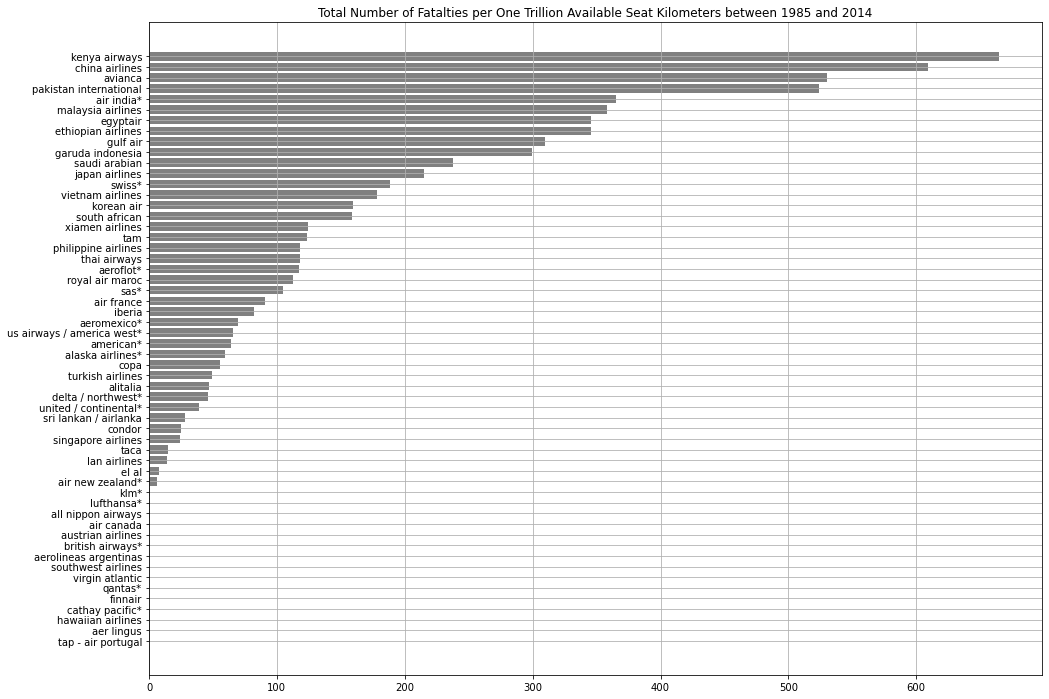

In [6]:
df = df.sort_values("total_fatalities per trillion_available_seat_km")
plt.figure(figsize=(16,12))
plt.barh(y = df["airline"], width = df['total_fatalities per trillion_available_seat_km'], color = 'gray')
plt.grid()
plt.title("Total Number of Fatalties per One Trillion Available Seat Kilometers between 1985 and 2014") 
plt.show()

In [7]:
df['fatailites_per_trillion_available_seat_km_85_99'] = np.round(df['fatalities_85_99'] / df['trillion_available_seat_km_85_99'])
df['incidents_per_trillion_available_seat_km_85_99'] = np.round(df['incidents_85_99'] / df['trillion_available_seat_km_85_99'])
df['fatal_accidents_per_trillion_available_seat_km_85_99'] = np.round(df['fatal_accidents_85_99'] / df['trillion_available_seat_km_85_99'])
df['fatailites_per_trillion_available_seat_km_00_14'] = np.round(df['fatalities_00_14'] / df['trillion_available_seat_km_00_14'])
df['incidents_per_trillion_available_seat_km_00_14'] = np.round(df['incidents_00_14'] / df['trillion_available_seat_km_00_14'])
df['fatal_accidents_per_trillion_available_seat_km_00_14'] = np.round(df['fatal_accidents_00_14'] / df['trillion_available_seat_km_00_14'])
df = df[['airline',
    'incidents_per_trillion_available_seat_km_85_99',
    'fatal_accidents_per_trillion_available_seat_km_85_99',
    'fatailites_per_trillion_available_seat_km_85_99',
    'incidents_per_trillion_available_seat_km_00_14',
    'fatal_accidents_per_trillion_available_seat_km_00_14',
    'fatailites_per_trillion_available_seat_km_00_14']]
df.to_csv("data2.csv")

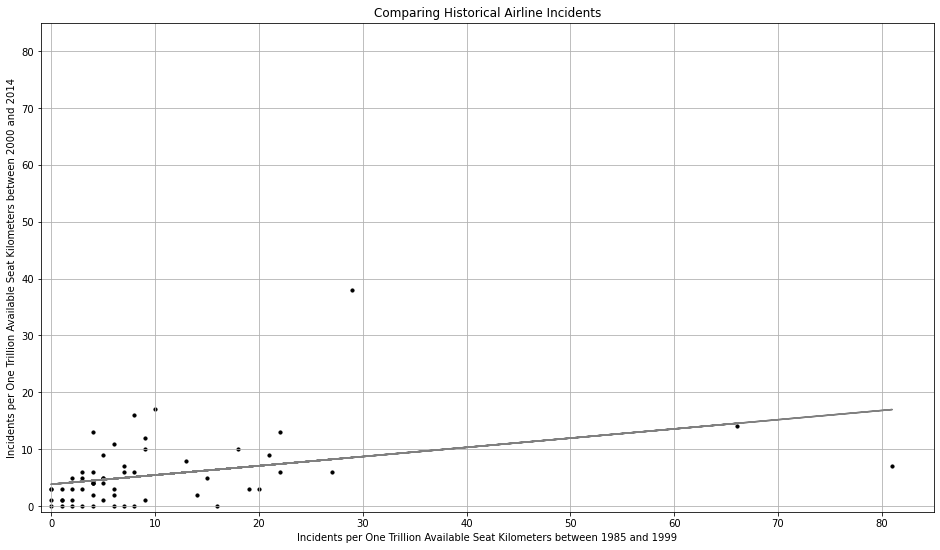

In [8]:
plt.figure(figsize=(16,9))
x = df['incidents_per_trillion_available_seat_km_85_99']
y = df['incidents_per_trillion_available_seat_km_00_14']
plt.scatter(x, y, s = 10, color = 'black')
plt.xlabel("Incidents per One Trillion Available Seat Kilometers between 1985 and 1999")
plt.ylabel("Incidents per One Trillion Available Seat Kilometers between 2000 and 2014")
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color = "gray")
plt.title("Comparing Historical Airline Incidents")
plt.xlim(-1,85)
plt.ylim(-1,85)
plt.grid()
plt.show()

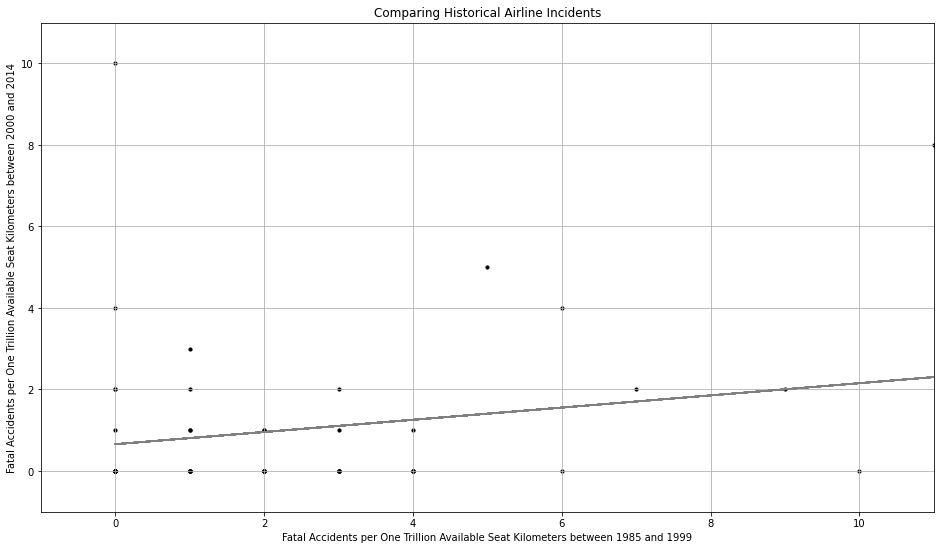

In [9]:
 plt.figure(figsize=(16,9))
x = df['fatal_accidents_per_trillion_available_seat_km_85_99']
y = df['fatal_accidents_per_trillion_available_seat_km_00_14']
plt.scatter(x, y, s = 10, color = 'black')
plt.xlabel("Fatal Accidents per One Trillion Available Seat Kilometers between 1985 and 1999")
plt.ylabel("Fatal Accidents per One Trillion Available Seat Kilometers between 2000 and 2014")
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color = "gray")
plt.title("Comparing Historical Airline Incidents")
plt.xlim(-1,11)
plt.ylim(-1,11)
plt.grid()
plt.show()

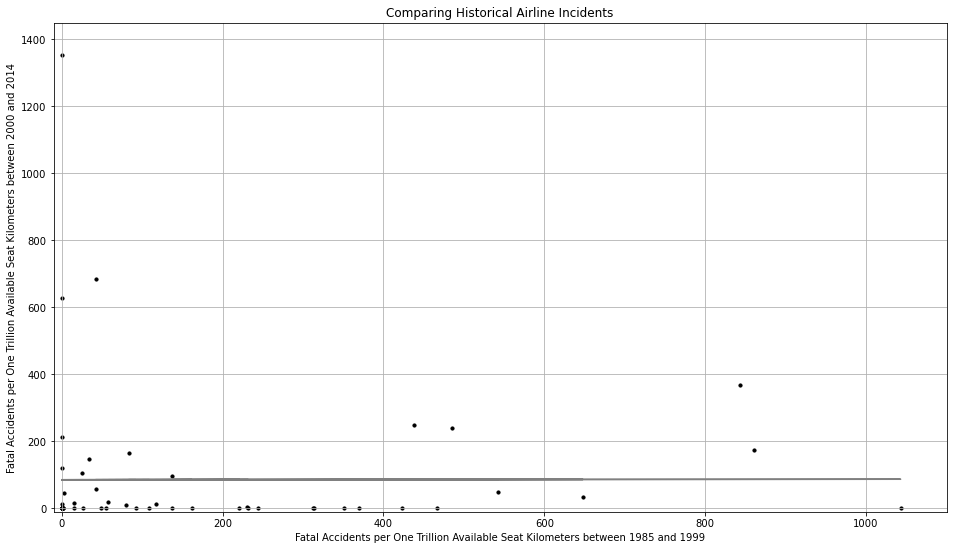

In [10]:
 plt.figure(figsize=(16,9))
x = df['fatailites_per_trillion_available_seat_km_85_99']
y = df['fatailites_per_trillion_available_seat_km_00_14']

plt.scatter(x, y, s = 10, color = 'black')
plt.xlabel("Fatal Accidents per One Trillion Available Seat Kilometers between 1985 and 1999")
plt.ylabel("Fatal Accidents per One Trillion Available Seat Kilometers between 2000 and 2014")
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color = "gray")
plt.title("Comparing Historical Airline Incidents")
plt.xlim(-10,1100)
plt.ylim(-10,1450)
plt.grid()
plt.show()